In [2]:
import csv

# 読み込む CSV
with open('./train.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)
# ['11', '12', '13', '14']
# ['21', '22', '23', '24']
# ['31', '32', '33', '34']

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
['1', '0', '3', 'Braund, Mr. Owen Harris', 'male', '22', '1', '0', 'A/5 21171', '7.25', '', 'S']
['2', '1', '1', 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'female', '38', '1', '0', 'PC 17599', '71.2833', 'C85', 'C']
['3', '1', '3', 'Heikkinen, Miss. Laina', 'female', '26', '0', '0', 'STON/O2. 3101282', '7.925', '', 'S']
['4', '1', '1', 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'female', '35', '1', '0', '113803', '53.1', 'C123', 'S']
['5', '0', '3', 'Allen, Mr. William Henry', 'male', '35', '0', '0', '373450', '8.05', '', 'S']
['6', '0', '3', 'Moran, Mr. James', 'male', '', '0', '0', '330877', '8.4583', '', 'Q']
['7', '0', '1', 'McCarthy, Mr. Timothy J', 'male', '54', '0', '0', '17463', '51.8625', 'E46', 'S']
['8', '0', '3', 'Palsson, Master. Gosta Leonard', 'male', '2', '3', '1', '349909', '21.075', '', 'S']
['9', '1', '3', 'Johnson, Mrs. Oscar W (Elis

(2値)分類問題を解いてみよう！
以下, 一般的なモデル構築の流れ
1.データの探索：各変数の分布を確認する, データの中身を理解する.
2.欠損値補完
3.合成変数の作成(例：集計変数を作る, ホットエンコードする, など)
4.変数変換を実施する(対数変換, 標準化など)
5.データを学習, 検証, テストに3分割する(データの性質に応じてやり方複数あり)
6.学習と検証データからモデル作成→複数作成して, 最も当てはまりの良いモデルを選ぶ(モデルの比較・評価)
    ・勾配ブースティング
    ・回帰木
    ・重回帰
    ・ランダムフォレスト
    ・NN
7.テストデータで精度確認(Kaggleでは不要かも？)

In [1]:
import pandas as pd
from pathlib import Path
# ヘッダー行がある場合
filepath = 'train.csv'
print(Path(filepath).read_text())
#col0,col1,col2
#0.0,1.1,2.2
#3.3,4.4,5.5
#6.6,7.7,8.8

df = pd.read_csv(filepath)
print(df)
#   col0  col1  col2  # ヘッダー行から列名を推測してくれる
#0   0.0   1.1   2.2
#1   3.3   4.4   5.5
#2   6.6   7.7   8.8

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S
6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/

In [4]:
# ヘッダー行がある場合
filepath = 'train.csv'
print(Path(filepath).read_text())
#col0,col1,col2
#0.0,1.1,2.2
#3.3,4.4,5.5
#6.6,7.7,8.8

df = pd.read_csv(filepath)
print(df)
#   col0  col1  col2  # ヘッダー行から列名を推測してくれる
#0   0.0   1.1   2.2
#1   3.3   4.4   5.5
#2   6.6   7.7   8.8

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S
6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

In [15]:
train_data = pd.read_csv("train.csv")

In [16]:
print(train_data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
train_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [27]:
train_new = train_data.copy()

In [31]:
takubo = pd.read_csv("train.csv")

In [33]:
print(train_data.Pclass.value_counts())
print('----')
print(train_data.Pclass.value_counts(sort=False))

3    491
1    216
2    184
Name: Pclass, dtype: int64
----
3    491
1    216
2    184
Name: Pclass, dtype: int64


In [34]:
# 文字列の部分一致検索
print(train_data[train_data.Name.ustr.contains('Mr.', regex=False)].Name)

0             Braund, Mr. Owen Harris
4            Allen, Mr. William Henry
5                    Moran, Mr. James
6             McCarthy, Mr. Timothy J
12     Saundercock, Mr. William Henry
                    ...              
881                Markun, Mr. Johann
883     Banfield, Mr. Frederick James
884            Sutehall, Mr. Henry Jr
889             Behr, Mr. Karl Howell
890               Dooley, Mr. Patrick
Name: Name, Length: 517, dtype: object


In [35]:
train_data.loc[:, 
["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]].corr().style.background_gradient(axis=None)

<AxesSubplot:ylabel='Survived'>

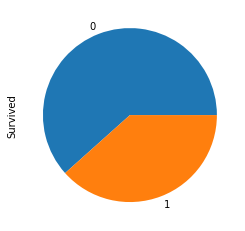

In [45]:
train_data.Survived.value_counts(sort=False).plot.pie()

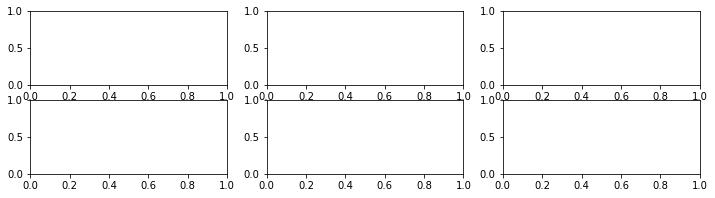

In [46]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 3))